<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Logistic Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 5bcc9b20907e7704347c2e9d705481e2ae74c98c

seaborn   : 0.11.0
json      : 2.0.9
matplotlib: 3.3.2
watermark : 2.1.0
pandas    : 1.1.3
numpy     : 1.19.2



In [3]:
plt.style.use('./d4sci.mplstyle')

## Load the dataset

In [4]:
data = pd.read_csv('data/iris.csv', delimiter=',', header=0)

Quick visualization of the data. Always a good way to make sure we have what we expect

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Set the labels. We will try to predict the 'virginica' label

In [6]:
data['y'] = 0
data.loc[data['species'] == 'virginica', 'y'] = 1

Extract the data as arrays

In [7]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,y
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1
149,5.9,3.0,5.1,1.8,virginica,1


In [8]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
y = data['y'].values.reshape(-1,1)

## Utility functions

Logistic function

In [9]:
def logistic(z):
    return 1./(1+np.exp(-z))

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)

Now we have a few more features

In [11]:
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

## Training procedure

In [13]:
oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs) # phi(z)
    
    deltas = alpha/M*np.dot(X.T, (Hs-y))
    weights -= deltas

    count += 1

    # Cross Entropy
    J = -1/M*(np.dot(y.T, np.log(Hs)) + np.dot(1-y.T, np.log(1-Hs)))
    
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[1.1560008]] [[1.99277896]] [-0.46297408 -1.35729245 -1.16528036  0.6473852   0.59005242]
20 [[2.12294998]] [[0.49268379]] [-0.60151347 -1.49813279 -1.46156225  1.52378212  1.14088778]
30 [[2.11725725]] [[1.33067722]] [-0.734653   -1.71540263 -1.70131648  2.12063207  1.56825162]
40 [[1.90129334]] [[1.15621699]] [-0.86584829 -2.00759618 -1.91343225  2.50088192  1.89952222]
50 [[1.72286106]] [[0.97909519]] [-0.99303424 -2.29277562 -2.11273397  2.85580781  2.21670277]
60 [[1.54705926]] [[0.80421654]] [-1.11719953 -2.56925694 -2.30529177  3.20105049  2.52688406]
70 [[1.36788224]] [[0.63687658]] [-1.23732141 -2.83268025 -2.48989395  3.53749237  2.82965127]
80 [[1.18246217]] [[0.48210359]] [-1.35153255 -3.07650468 -2.66307648  3.86199069  3.12193428]
90 [[0.98392199]] [[0.34153596]] [-1.45708903 -3.29065619 -2.81932047  4.16934441  3.39841121]
100 [[0.74758902]] [[0.20892817]] [-1.54859179 -3.45325074 -2.94701039  4.453021    3.64992439]
110 [[0.37665239]] [[0.05232556]] [-1.6067874  -3.

## Solution exploration

In [14]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs, Hs, 'X', label='empirical', markersize=8)
    plt.plot(Zs, y, 'd', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')
    #plt.title('Logistic Regression')
    plt.legend()

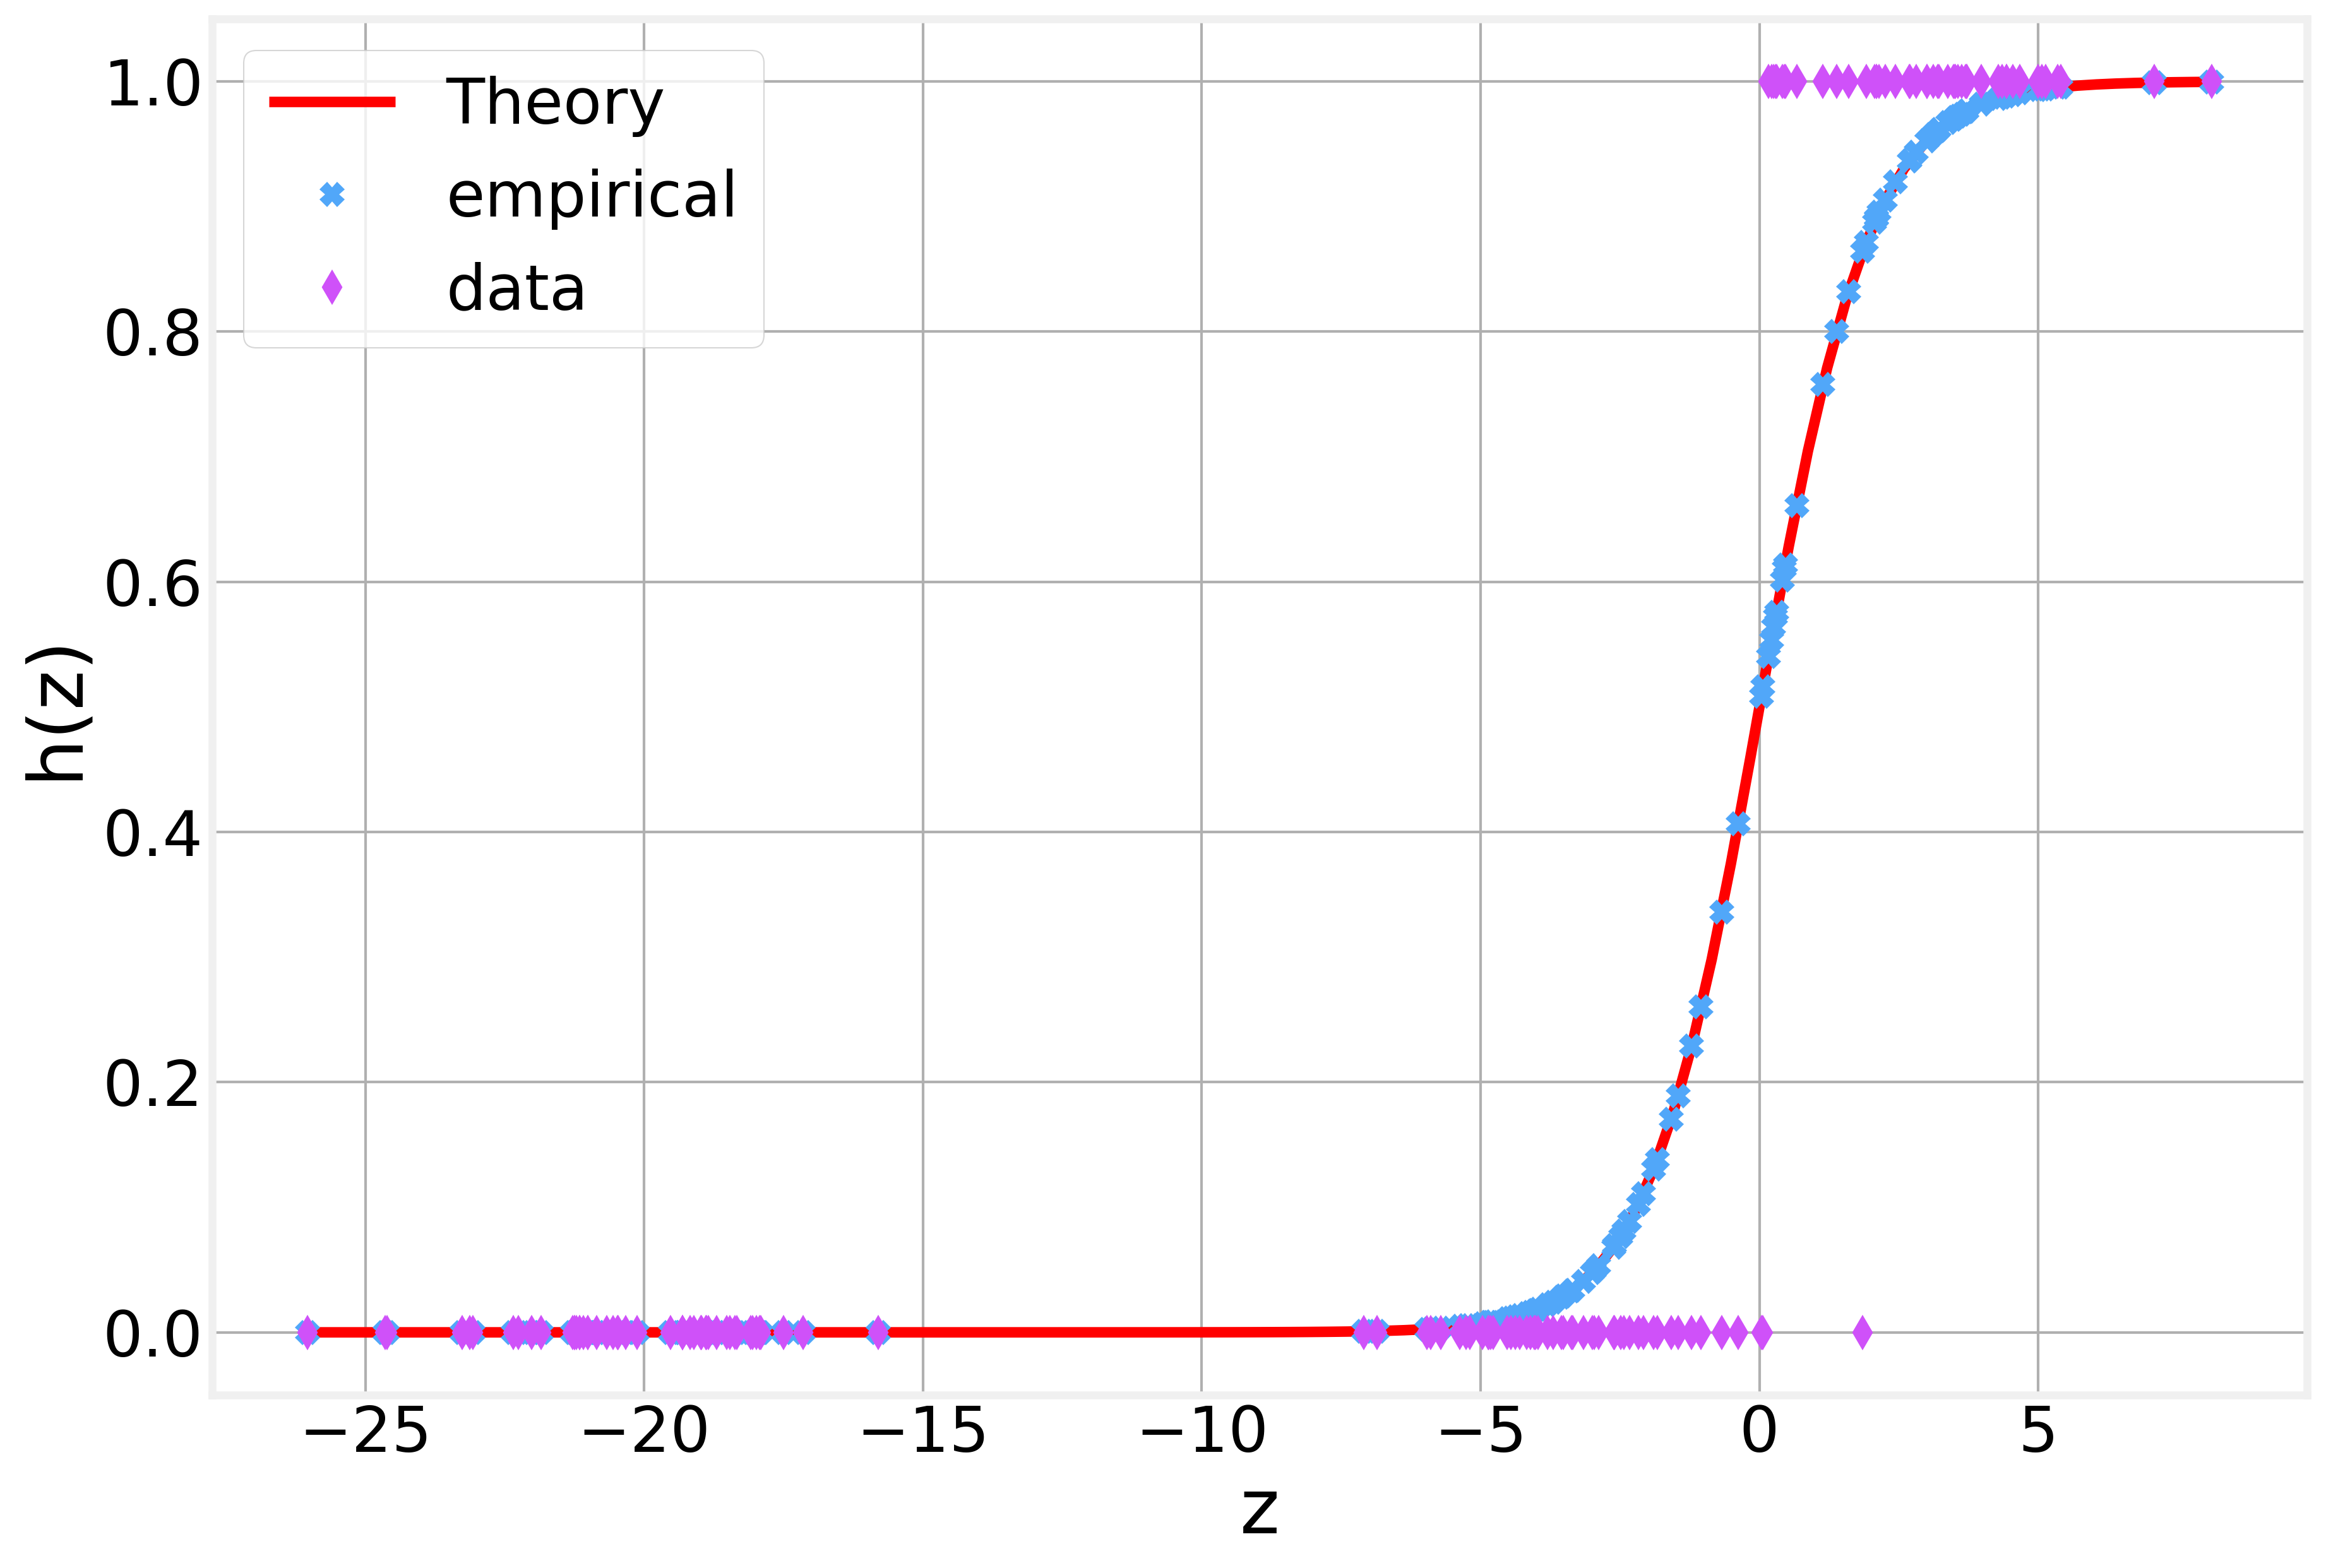

In [15]:
plot_boundary(Zs, Hs, y)

Utility function to plot labeled points

In [16]:
def plot_points(data, features, weights, label='y'):
    plt.plot(data[features[0]][data[label]==0], 
             data[features[1]][data[label]==0], '*', label='y=0', markersize=8)
    
    plt.plot(data[features[0]][data[label]==1], 
             data[features[1]][data[label]==1], 'd', label='y=1', markersize=8)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()

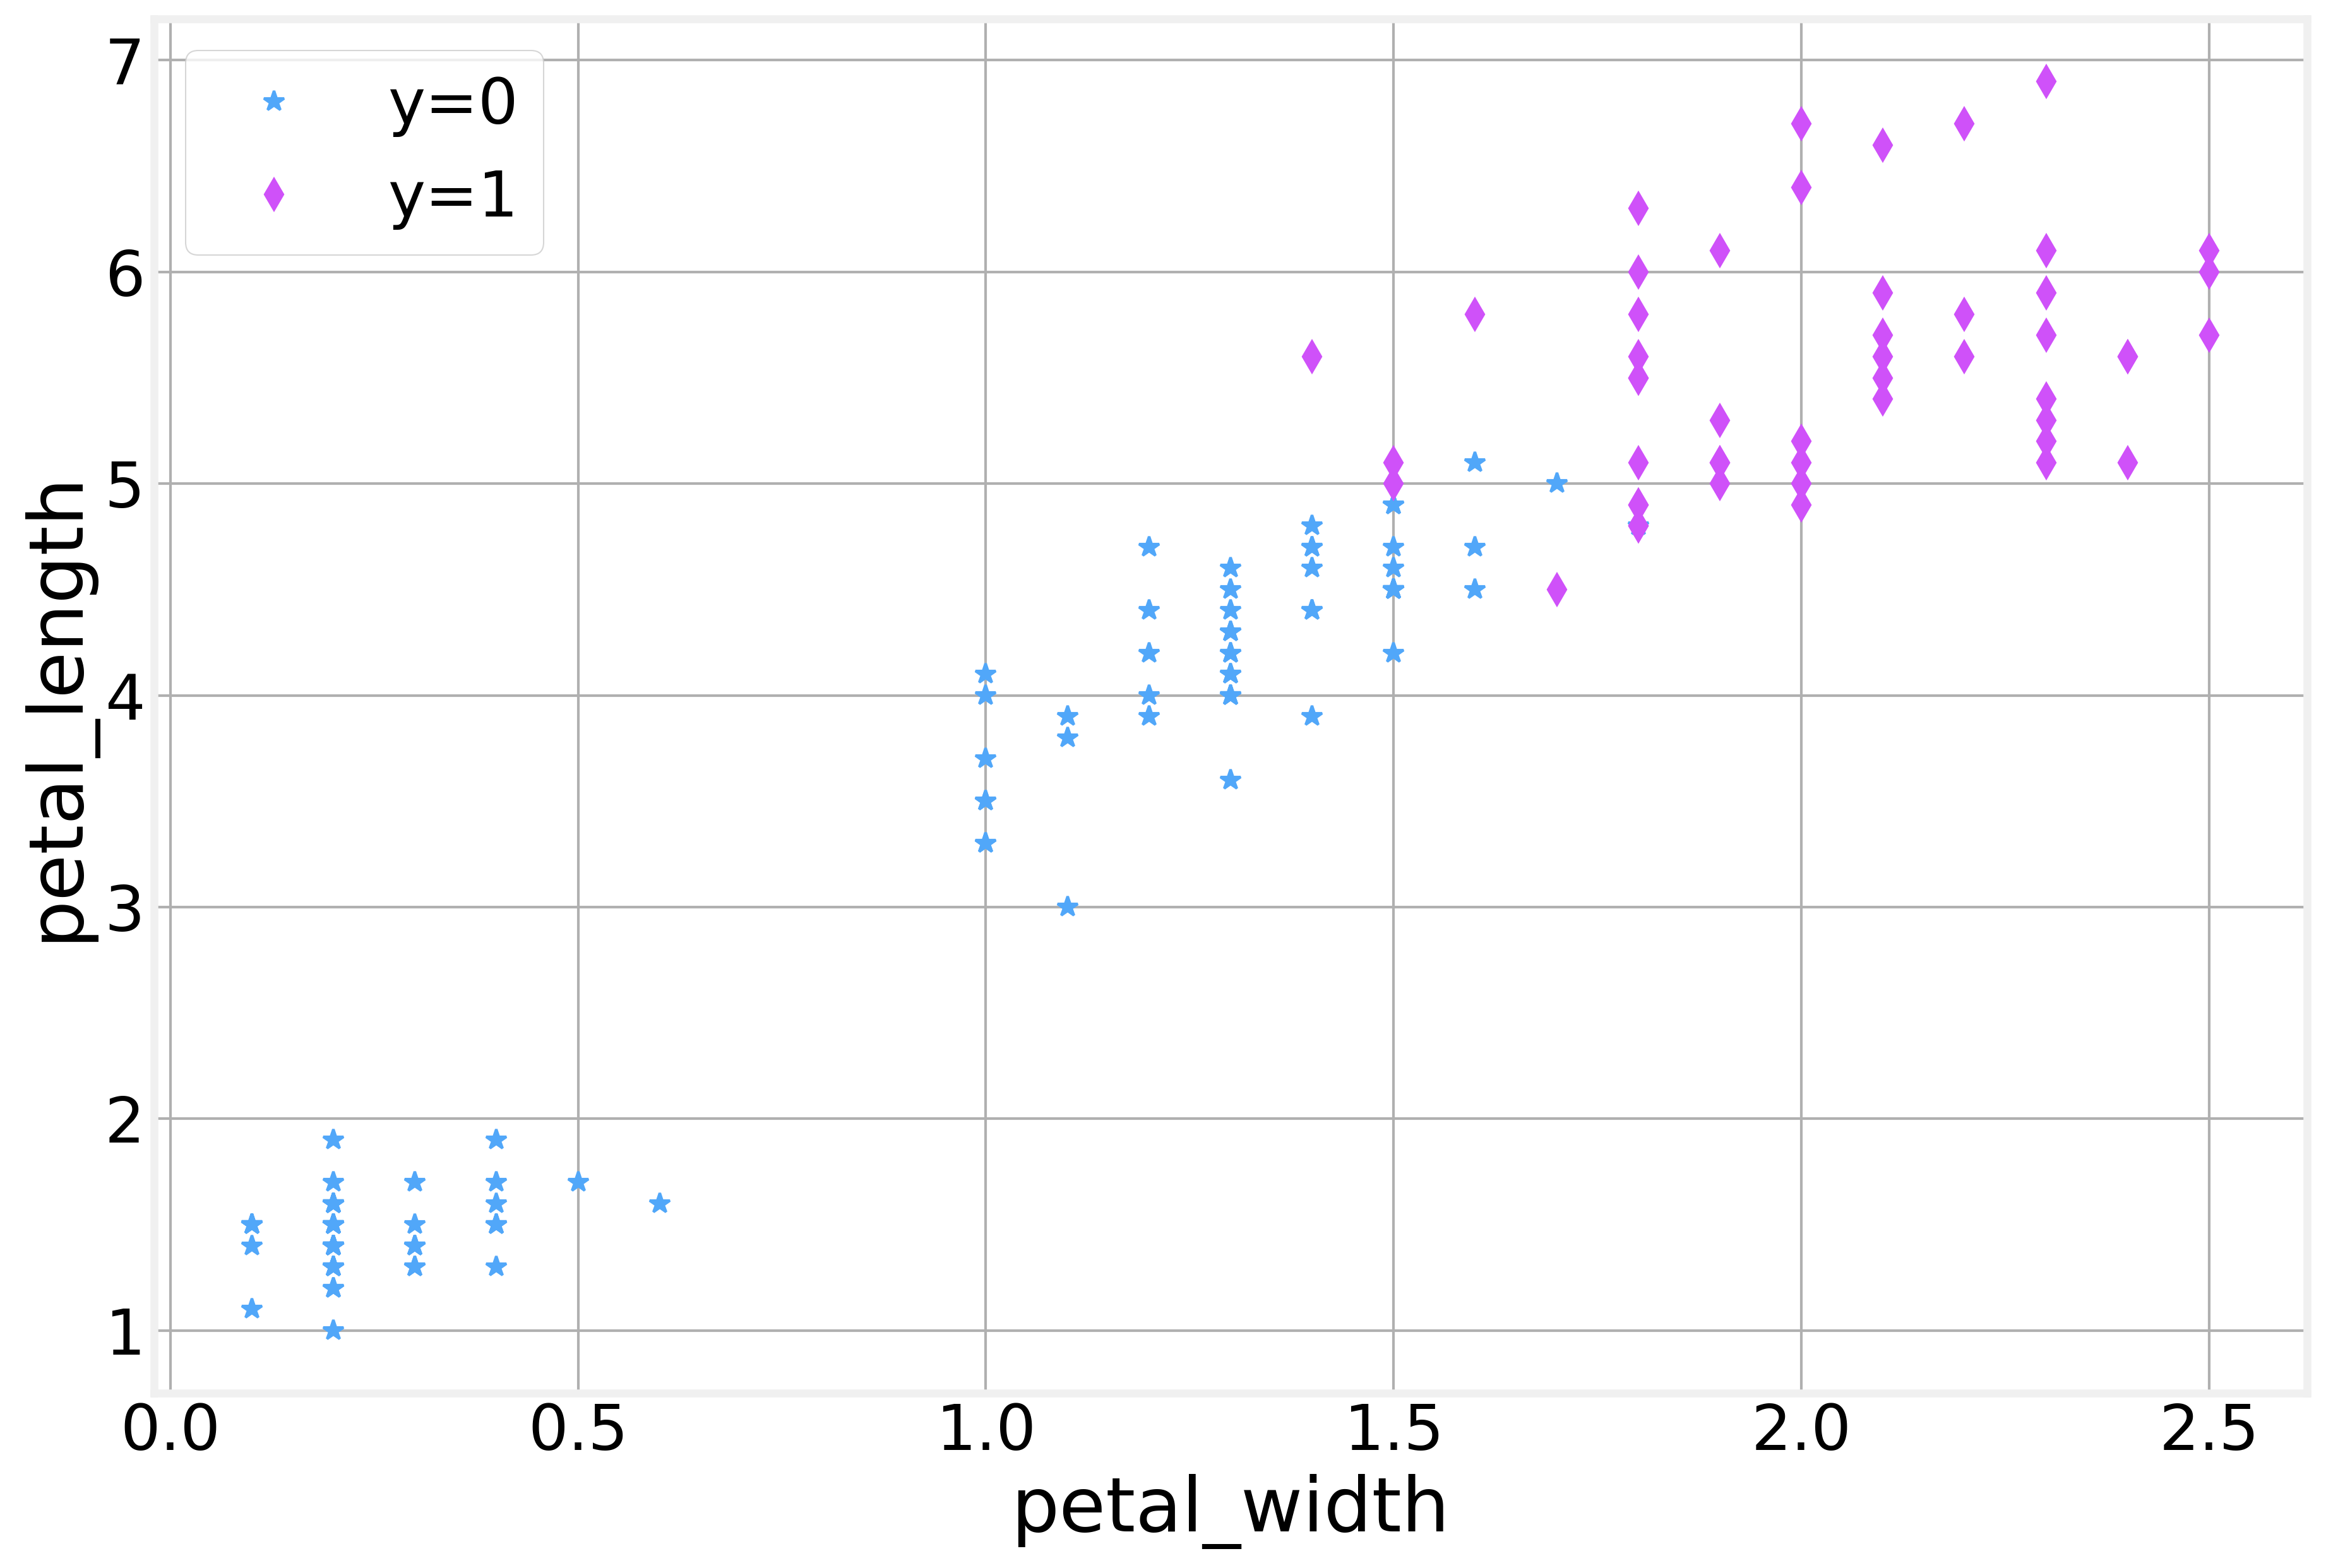

In [17]:
plot_points(data, ['petal_width', 'petal_length'], weights)

The separation bounday is not perfect here either

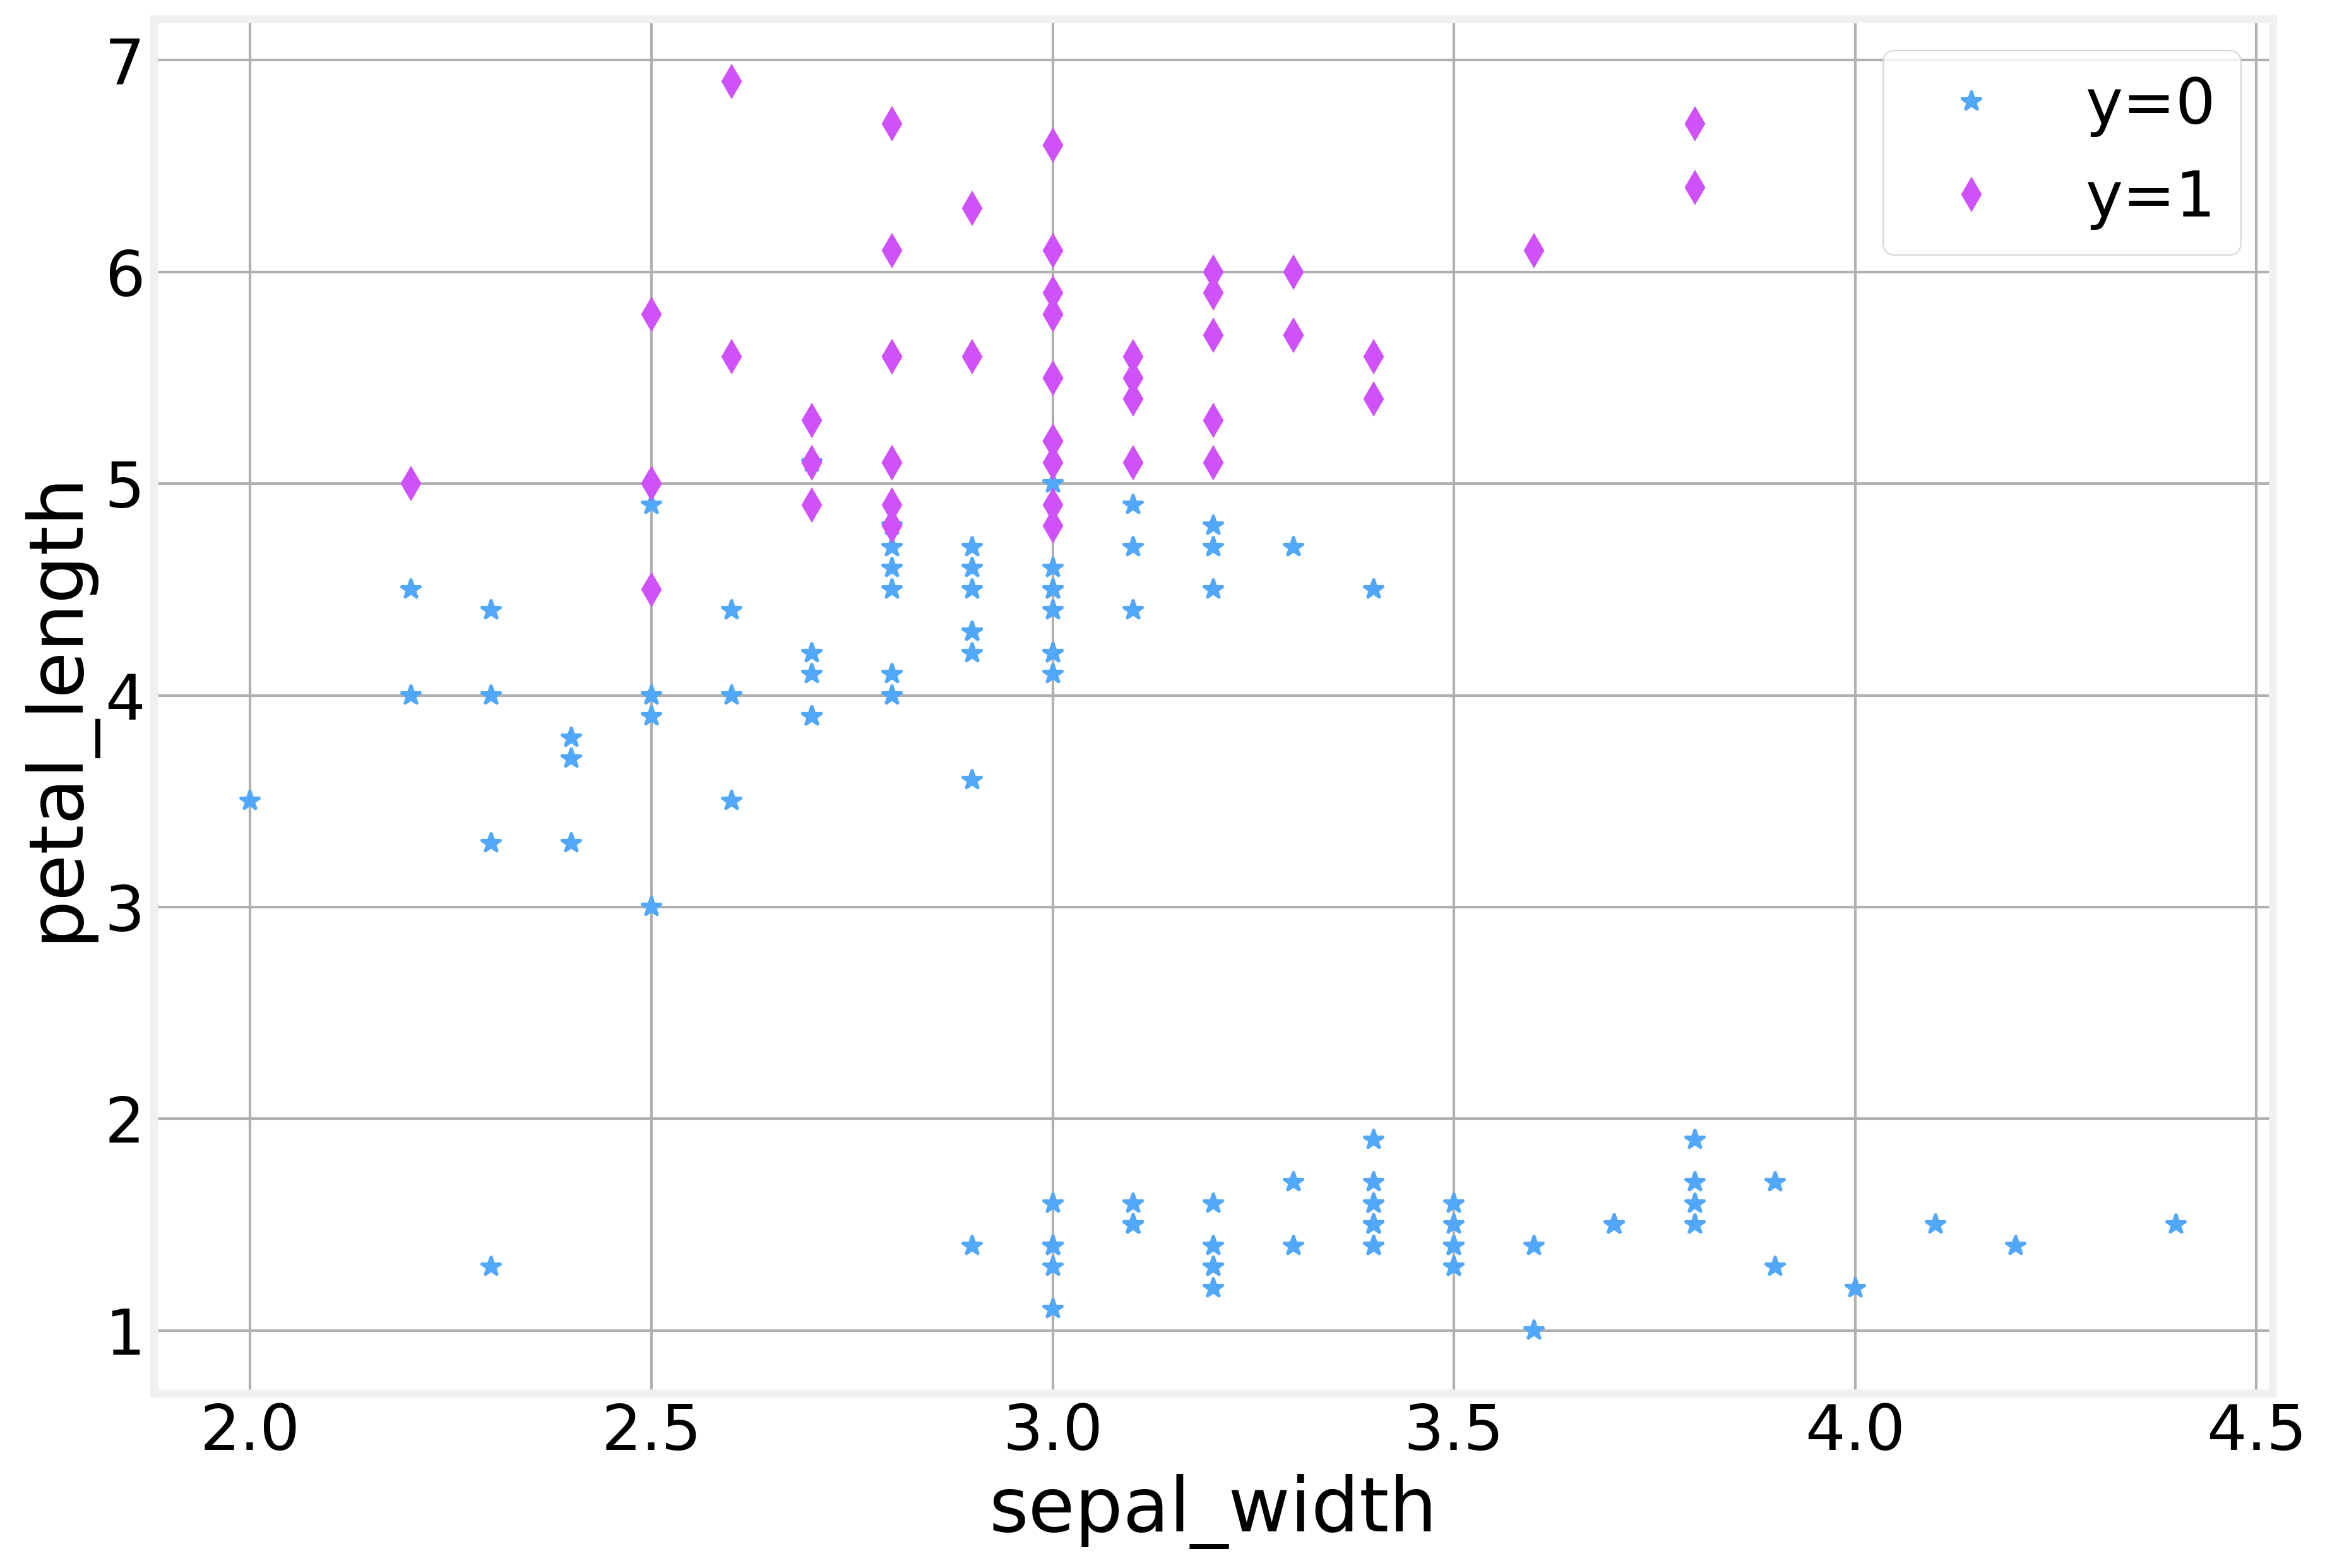

In [18]:
plot_points(data, ['sepal_width', 'petal_length'], weights)

In [19]:
def plot_boundary_threshold(Zs, Hs, y, threshold=0.5):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs[Hs>threshold], Hs[Hs>threshold], 'X', label='empirical 1', markersize=8)
    plt.plot(Zs[Hs<=threshold], Hs[Hs<=threshold], 's', label='empirical 0', markersize=8)

    plt.plot(Zs, y, 'd', label = 'data', markersize=8)
    plt.xlabel('z')
    plt.ylabel('h(z)')    
    plt.plot([Zs.min(), Zs.max()], [threshold, threshold],  lw=5, linestyle=':', color='darkgray')
    plt.legend()

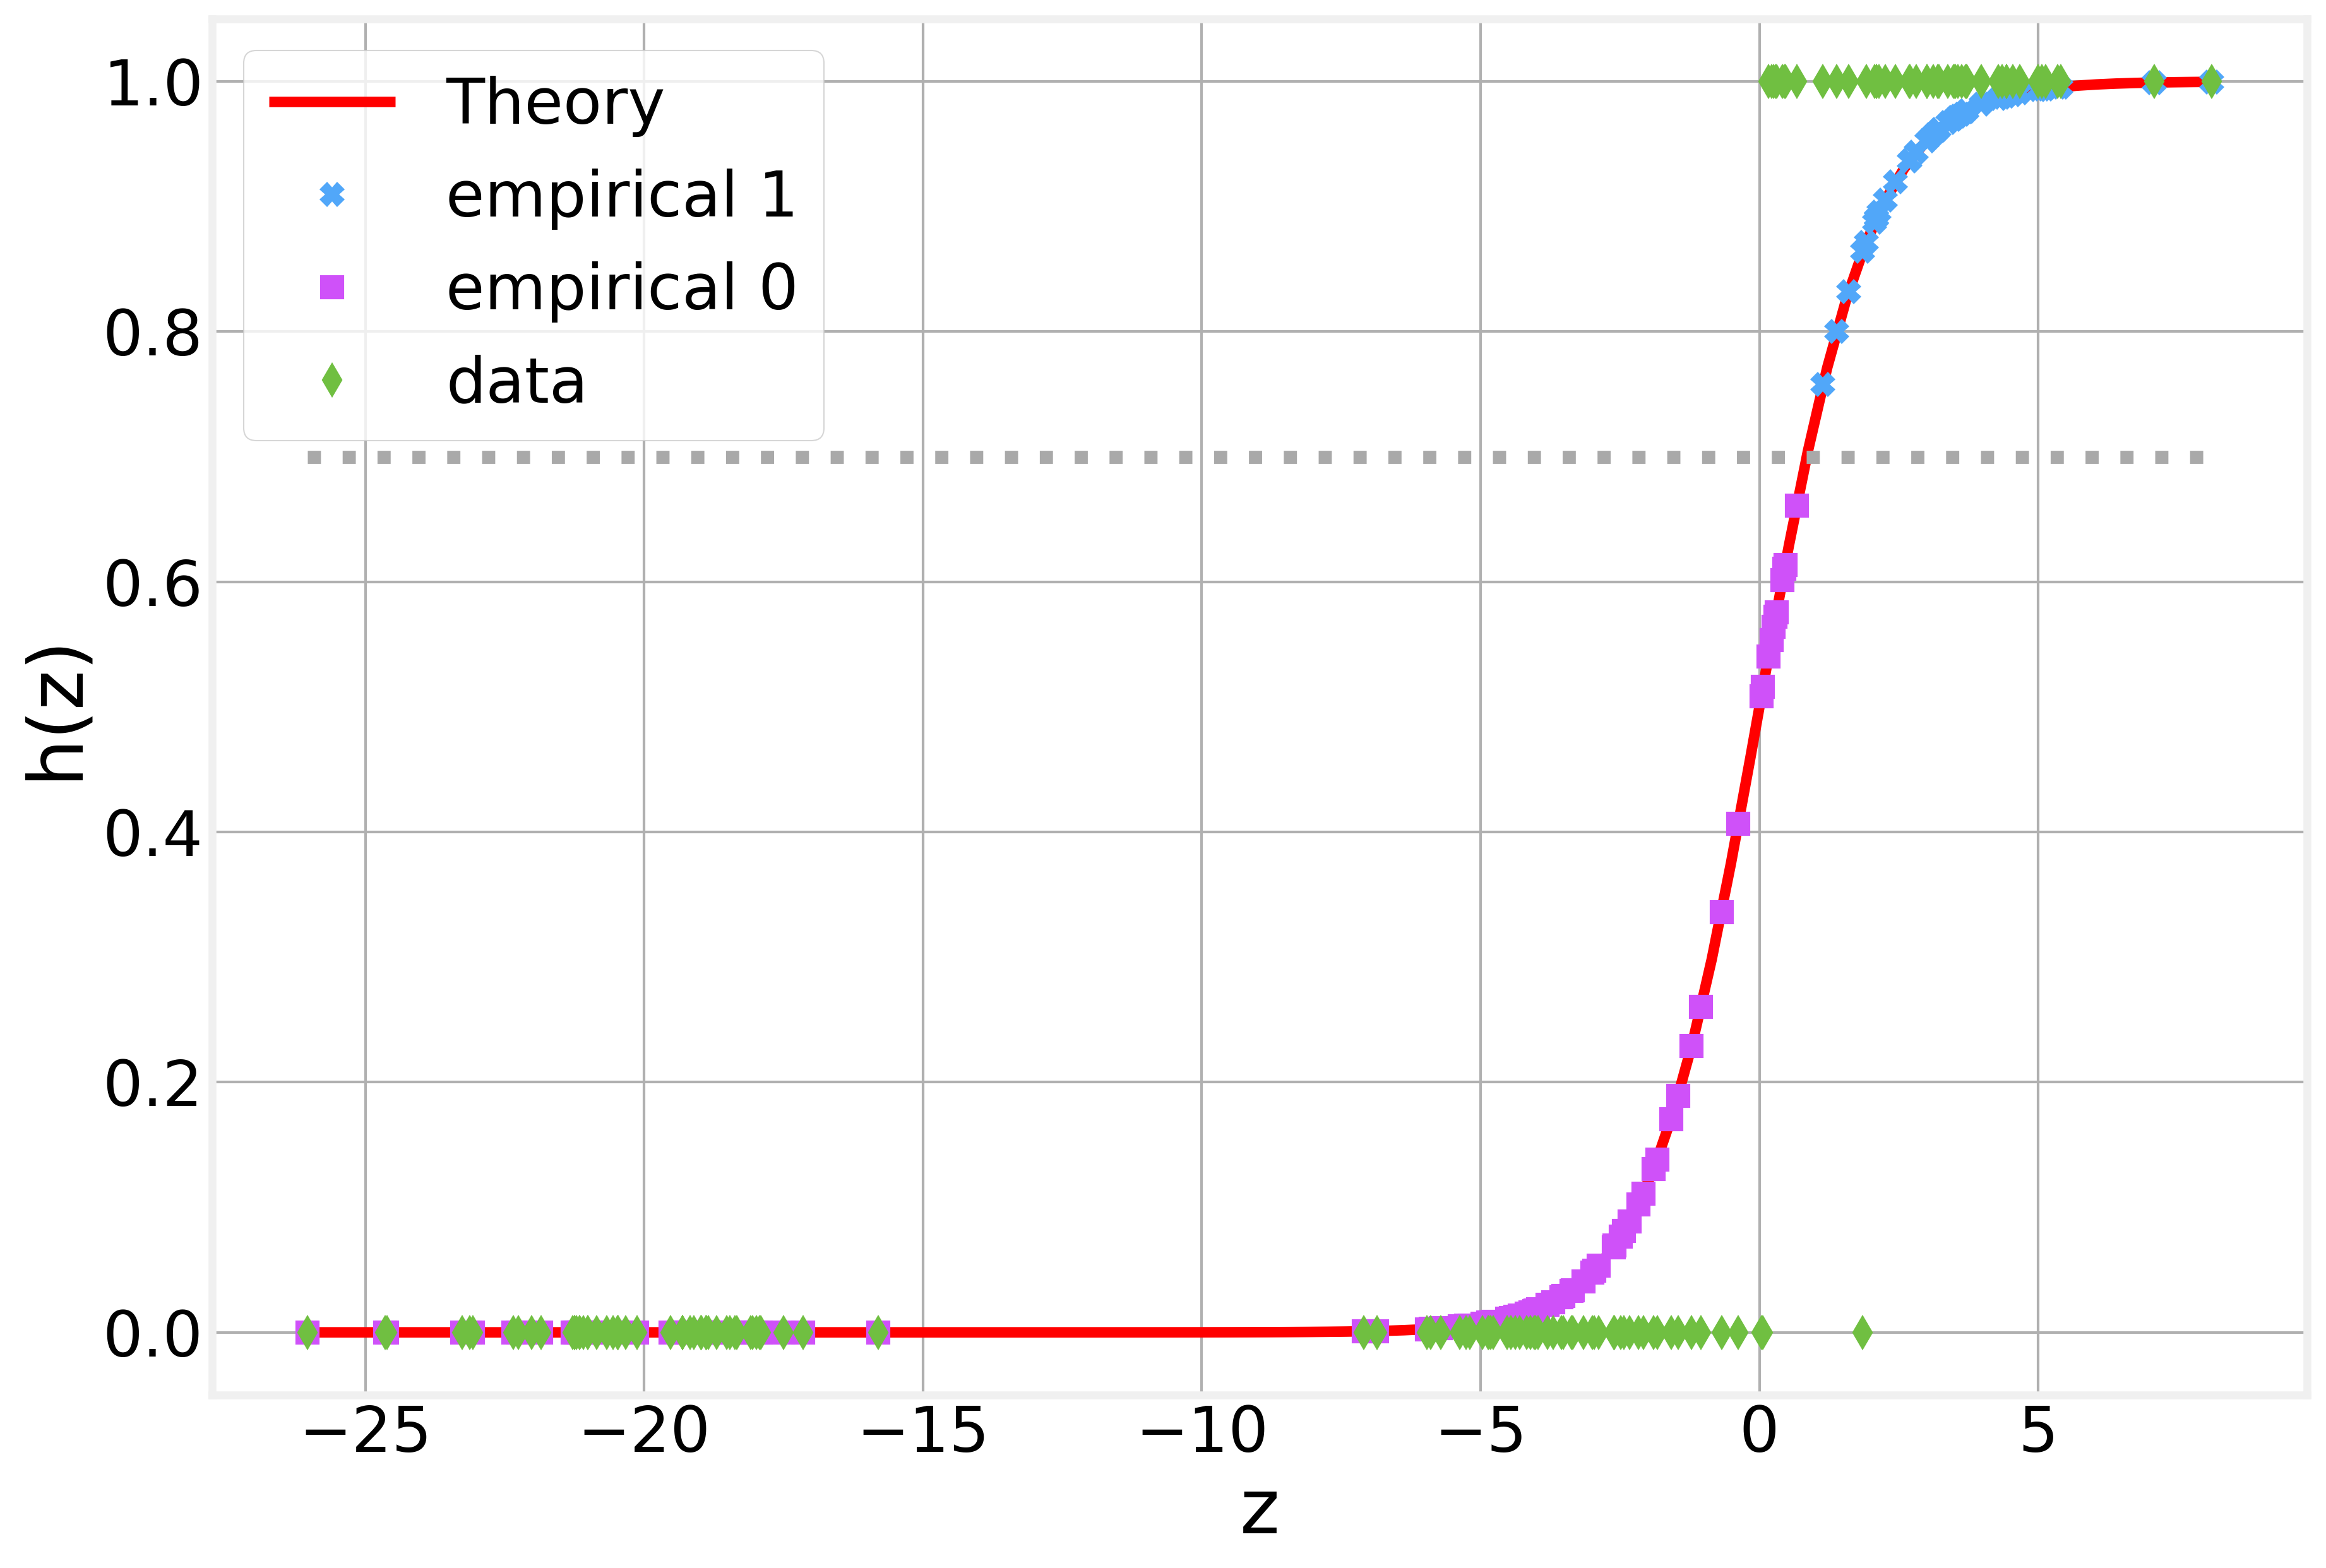

In [20]:
plot_boundary_threshold(Zs, Hs, y, 0.7)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>